In [0]:


from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from keras.models import Sequential 
from keras.layers import Dense

print(tf.__version__) 


1.13.1


In [0]:
#Getting data from github repository   
url = 'https://raw.githubusercontent.com/Mshire130/Ml-datasets/master/winequality-red.csv' 
raw_data = pd.read_csv(url) 
raw_data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
#Checking for any NaN data
raw_data.isna().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
#Separating training and testing data
train_dataset = raw_data.sample(frac=0.8, random_state=0) 
test_dataset = raw_data.drop(train_dataset.index)

train_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [0]:
#Describing the dataset, I think this is so that you can access the mean and std 
#which is required to normalise the data
train_stats = train_dataset.describe() 
train_stats.pop('quality')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1279.0,8.310164,1.744190,4.60000,7.1000,7.90000,9.250000,15.9000
volatile acidity,1279.0,0.525571,0.176645,0.12000,0.3900,0.52000,0.635000,1.5800
citric acid,1279.0,0.271618,0.196822,0.00000,0.0900,0.26000,0.430000,0.7900
residual sugar,1279.0,2.516341,1.300985,0.90000,1.9000,2.20000,2.600000,13.9000
chlorides,1279.0,0.087347,0.045666,0.01200,0.0710,0.07900,0.091000,0.6110
free sulfur dioxide,1279.0,15.868647,10.438880,1.00000,7.0000,14.00000,21.000000,72.0000
total sulfur dioxide,1279.0,46.488663,32.952841,6.00000,22.0000,38.00000,62.000000,289.0000
density,1279.0,0.996739,0.001888,0.99007,0.9956,0.99676,0.997855,1.0032
pH,1279.0,3.312588,0.153923,2.87000,3.2100,3.31000,3.400000,4.0100
sulphates,1279.0,0.655012,0.160192,0.33000,0.5500,0.62000,0.730000,1.9800


In [0]:
train_label = train_dataset.pop('quality')



In [0]:
test_label = test_dataset.pop('quality')


In [0]:
train_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4


In [0]:
#As this dataset has loads of different scales and such, its important to normalise the data.
#As far as I know (not much)
def norm(x):
  return (x - train_stats['mean'])/train_stats['std'] 

norm_train_data = norm(train_dataset)
norm_test_data = norm(test_dataset)

norm_train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,1.427503,-0.314591,0.804694,-0.320020,1.831844,1.066336,0.592099,0.774007,-0.926356,0.655390,0.335446
1032,-0.120494,1.666788,-1.380020,1.217277,0.167583,-1.041170,-0.985914,0.954123,0.308023,-0.780387,-0.771385
1002,0.452838,-1.333585,0.296621,-0.358452,-0.533158,-0.274804,-0.591411,-0.836442,-0.341650,1.154791,1.165568
487,1.083504,0.676099,0.449043,-0.550614,-0.752139,-1.041170,-0.985914,0.774007,-0.926356,-1.467063,-0.402441
979,2.230168,-0.427812,1.109538,-0.858074,-0.270380,-1.232761,-1.228685,0.085328,-1.186226,-0.156136,-0.033498


In [0]:
#Setting up the model 


def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation = tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation = tf.nn.relu),
    layers.Dense(11, activation =tf.nn.softmax )   
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model.compile(loss = 'mean_squared_error',
                optimizer = optimizer,
                metrics = ['mean_absolute_error', 'mean_squared_error'])
  return model 

In [0]:
#Generating model 
model = build_model() 


In [0]:
#Summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_82 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_83 (Dense)             (None, 11)                715       
Total params: 5,643
Trainable params: 5,643
Non-trainable params: 0
_________________________________________________________________


In [0]:
#trialling the model on a small batch to see if it works as expected
example_batch = norm_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.07095689, 0.08891588, 0.08345447, 0.09107023, 0.0941749 ,
        0.1252154 , 0.04739787, 0.08806388, 0.06430218, 0.13636617,
        0.11008208],
       [0.06175797, 0.2595143 , 0.0310208 , 0.02483113, 0.06210509,
        0.22352158, 0.02603831, 0.03857189, 0.06197534, 0.04167744,
        0.16898614],
       [0.08677311, 0.08634458, 0.07950517, 0.08126787, 0.09014487,
        0.10169705, 0.07279043, 0.07608795, 0.08796654, 0.09572984,
        0.14169267],
       [0.09948801, 0.16001065, 0.04914477, 0.05599492, 0.07202701,
        0.11987652, 0.0716688 , 0.06086199, 0.08015896, 0.06354211,
        0.16722627],
       [0.10569001, 0.11188319, 0.0579391 , 0.06122727, 0.08572756,
        0.12536629, 0.06176223, 0.07378455, 0.09349295, 0.07196549,
        0.15116139],
       [0.12195317, 0.16732927, 0.07214878, 0.05920912, 0.06589043,
        0.10697881, 0.05716025, 0.06065119, 0.06945139, 0.071506  ,
        0.14772168],
       [0.10896521, 0.13314462, 0.06083636, 0.05595559, 0.

In [0]:
#setting number of epochs and fitting the model
EPOCHS = 1000 
history = model.fit(norm_train_data, train_label,
                    epochs = EPOCHS, validation_split = 0.2, verbose = 1) 



Train on 1023 samples, validate on 256 samples
Epoch 1/1000
1023/1023 [==============================] - 1s 629us/sample - loss: 31.2596 - mean_absolute_error: 5.5337 - mean_squared_error: 31.2596 - val_loss: 31.5219 - val_mean_absolute_error: 5.5497 - val_mean_squared_error: 31.5219
Epoch 2/1000
1023/1023 [==============================] - 0s 61us/sample - loss: 31.2594 - mean_absolute_error: 5.5337 - mean_squared_error: 31.2594 - val_loss: 31.5218 - val_mean_absolute_error: 5.5497 - val_mean_squared_error: 31.5218
Epoch 3/1000
1023/1023 [==============================] - 0s 60us/sample - loss: 31.2593 - mean_absolute_error: 5.5337 - mean_squared_error: 31.2593 - val_loss: 31.5218 - val_mean_absolute_error: 5.5497 - val_mean_squared_error: 31.5218
Epoch 4/1000
1023/1023 [==============================] - 0s 59us/sample - loss: 31.2593 - mean_absolute_error: 5.5337 - mean_squared_error: 31.2593 - val_loss: 31.5218 - val_mean_absolute_error: 5.5497 - val_mean_squared_error: 31.5218
Epoc

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


In [0]:
#creating function for plotting history
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(hist['epoch'],hist['mean_absolute_error'], label = 'Train error')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'], label = 'Val error')
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.plot(hist['epoch'],hist['mean_squared_error'], label = 'Train error')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'], label = 'Val error')

  plt.legend()
  
  plt.show()

  
  
  

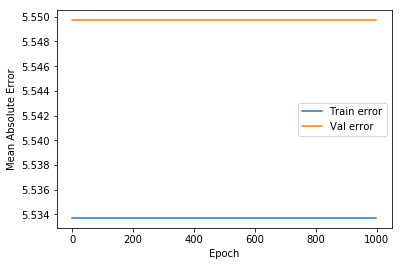

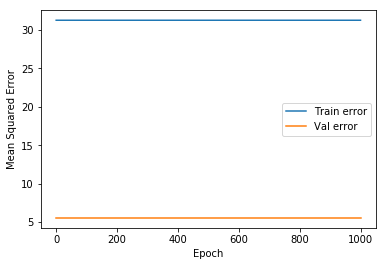

In [0]:
#plotting absolute and squared error against epoch
plot_history(history)

In [0]:
#From graphs generated above, this seems like an overfitting
#To prevent over fitting, we will use early stopping 

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(norm_train_data, train_label, epochs = EPOCHS, validation_split = 0.2, verbose = 1, callbacks = [early_stop])


Train on 1023 samples, validate on 256 samples
Epoch 1/1000
1023/1023 [==============================] - 1s 668us/sample - loss: 31.2595 - mean_absolute_error: 5.5337 - mean_squared_error: 31.2595 - val_loss: 31.5218 - val_mean_absolute_error: 5.5497 - val_mean_squared_error: 31.5218
Epoch 2/1000
1023/1023 [==============================] - 0s 65us/sample - loss: 31.2594 - mean_absolute_error: 5.5337 - mean_squared_error: 31.2594 - val_loss: 31.5218 - val_mean_absolute_error: 5.5497 - val_mean_squared_error: 31.5218
Epoch 3/1000
1023/1023 [==============================] - 0s 62us/sample - loss: 31.2593 - mean_absolute_error: 5.5337 - mean_squared_error: 31.2593 - val_loss: 31.5218 - val_mean_absolute_error: 5.5497 - val_mean_squared_error: 31.5218
Epoch 4/1000
1023/1023 [==============================] - 0s 61us/sample - loss: 31.2593 - mean_absolute_error: 5.5337 - mean_squared_error: 31.2593 - val_loss: 31.5218 - val_mean_absolute_error: 5.5497 - val_mean_squared_error: 31.5218
Epoc

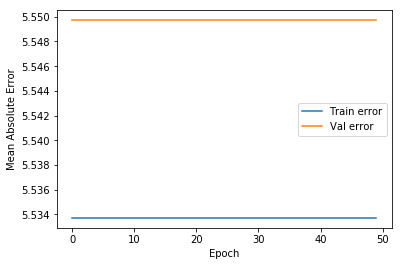

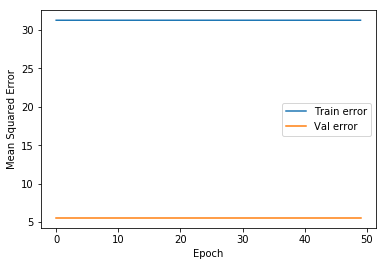

In [0]:
#Calling plot function after implementing early stopping to prevent overfitting
plot_history(history)

In [0]:
#not really sure what this graph means now
#testing how well the model generalizes using the test dataset. We can expect the model to behave in the same way when use it in the real world

loss, mae, mse = model.evaluate(norm_test_data, test_label, verbose=1)

print('Testing set Mean absolute error: {:5.2f} Quality'.format(mae))

320/320 [==============================] - 0s 52us/sample - loss: 31.7526 - mean_absolute_error: 5.5778 - mean_squared_error: 31.7526
Testing set Mean absolute error:  5.58 Quality


ValueError: ignored

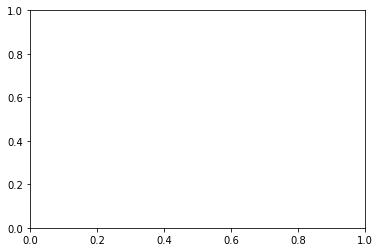

In [0]:
#An absolute error of +- 0.53 quality seems to be good
#Will continue predicting 

test_predictions = model.predict(norm_test_data).flatten()

plt.scatter(test_predictions,test_label)
plt.ylabel('True Quality Value')
plt.xlabel('Predicted Quality Value')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([0, 100], [0, 100])


In [0]:
#I dont quite understand this graph, it does not look like its an adequate prediction. 